# Requête 1 : la proportion de personnes en état de sous-nutrition en 2017

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_sous_nutrition = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\sous_nutrition.csv")
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [3]:
df_population = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\population.csv")
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [4]:
df_sous_nutrition = df_sous_nutrition[df_sous_nutrition["Année"].eq("2016-2018")]
df_population = df_population[df_population['Année'].eq(2017)]

In [5]:
df_final = pd.merge(df_sous_nutrition, df_population, on = 'Zone', how = "inner")
df_final.head()

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2016-2018,10.5,2017,36296.113
1,Afrique du Sud,2016-2018,3.1,2017,57009.756
2,Albanie,2016-2018,0.1,2017,2884.169
3,Algérie,2016-2018,1.3,2017,41389.189
4,Allemagne,2016-2018,NaN,2017,82658.409


In [6]:
del df_final['Année_x']
del df_final['Année_y']
df_final['pop_millions'] = df_final['Valeur_y']*1000
del df_final['Valeur_y']

In [7]:
df_final.rename(columns={"Valeur_x":"nb_ss_nutrition"}, inplace = True)
df_final.head()

,Zone,nb_ss_nutrition,pop_millions
0,Afghanistan,10.5,36296113.0
1,Afrique du Sud,3.1,57009756.0
2,Albanie,0.1,2884169.0
3,Algérie,1.3,41389189.0
4,Allemagne,NaN,82658409.0


In [8]:
df_final['pop_millions'] = df_final['pop_millions'].astype('int64')
df_final.dtypes

Zone               object
nb_ss_nutrition    object
pop_millions        int64
dtype: object

In [9]:
df_final.loc[df_final['nb_ss_nutrition'] == '<0.1','nb_ss_nutrition' ] = '0.1'
df_final['nb_ss_nutrition'] = df_final['nb_ss_nutrition'].astype(float)

In [10]:
df_final.dtypes

Zone                object
nb_ss_nutrition    float64
pop_millions         int64
dtype: object

In [11]:
resultat = ((df_final['nb_ss_nutrition'].sum()*10**6) / (df_final['pop_millions'].sum()))
print((resultat*100).round(2))

7.13


### Ainsi, en 2017, 7,13% de la population mondiale était en état de sous-nutrition

# Requête 2: le nombre théorique de personnes qui pourraient être nourries

In [12]:
df_dispo_alim = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\dispo_alimentaire.csv")
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [13]:
df_population = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\population.csv")
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [14]:
df_dispo_alim = df_dispo_alim.groupby(by=['Zone']).sum('Disponibilité alimentaire (Kcal/personne/jour)')
df_dispo_alim.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0


In [15]:
df_population = df_population[df_population['Année'].eq(2017)]

In [16]:
df_final = pd.merge(df_dispo_alim, df_population, on = "Zone", how='inner')
df_final.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017,36296.113
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017,57009.756
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017,2884.169
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017,41389.189
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017,82658.409


In [17]:
df_final = df_final.iloc[:,[0,3,17]]

In [18]:
df_final['pop_millions'] = (df_final['Valeur']*1000).astype('int64')

In [19]:
del df_final['Valeur']
df_final.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),pop_millions
0,Afghanistan,2087.0,36296113
1,Afrique du Sud,3020.0,57009755
2,Albanie,3188.0,2884169
3,Algérie,3293.0,41389189
4,Allemagne,3503.0,82658409


In [20]:
df_final.dtypes

Zone                                               object
Disponibilité alimentaire (Kcal/personne/jour)    float64
pop_millions                                        int64
dtype: object

In [21]:
df_final["Kcal_pays_an"] = df_final["Disponibilité alimentaire (Kcal/personne/jour)"]*df_final["pop_millions"]*365
df_final.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),pop_millions,Kcal_pays_an
0,Afghanistan,2087.0,36296113,2.764875e+13
1,Afrique du Sud,3020.0,57009755,6.284185e+13
2,Albanie,3188.0,2884169,3.356077e+12
3,Algérie,3293.0,41389189,4.974753e+13
4,Allemagne,3503.0,82658409,1.056866e+14


In [22]:
resultat = (df_final["Kcal_pays_an"].sum()) / (2500*365)
print ((resultat/10**9).round(3))

8.368


### Ainsi, en 2017: 8,368 milliards de personnes auraient pu être théoriquement être nourris

# Requête 3: en 2017, le nombre théorique de personnes qui pourraient être nourries  avec uniquement des produits végétaux

In [23]:
df_dispo_alim = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\dispo_alimentaire.csv")
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df_population = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\population.csv")
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [25]:
df_dispo_alim = df_dispo_alim[df_dispo_alim['Origine'].eq('vegetale')]

In [26]:
df_dispo_alim = df_dispo_alim.groupby(by=['Zone']).sum('Disponibilité alimentaire (Kcal/personne/jour)')

In [27]:
df_population = df_population[df_population['Année'].eq(2017)]

In [28]:
df_final = pd.merge(df_dispo_alim, df_population, on = "Zone", how='inner')
df_final.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2017,36296.113
1,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2017,57009.756
2,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2017,2884.169
3,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2017,41389.189
4,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2017,82658.409


In [29]:
df_final = df_final.iloc[:,[0,3,17]]

In [30]:
df_final['pop_millions'] = (df_final['Valeur']*1000).astype('int64')

In [31]:
del df_final['Valeur']
df_final.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),pop_millions
0,Afghanistan,1871.0,36296113
1,Afrique du Sud,2533.0,57009755
2,Albanie,2203.0,2884169
3,Algérie,2915.0,41389189
4,Allemagne,2461.0,82658409


In [32]:
df_final.dtypes

Zone                                               object
Disponibilité alimentaire (Kcal/personne/jour)    float64
pop_millions                                        int64
dtype: object

In [33]:
df_final["Kcal_pays_an"] = df_final["Disponibilité alimentaire (Kcal/personne/jour)"]*df_final["pop_millions"]*365
df_final.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),pop_millions,Kcal_pays_an
0,Afghanistan,1871.0,36296113,2.478716e+13
1,Afrique du Sud,2533.0,57009755,5.270808e+13
2,Albanie,2203.0,2884169,2.319146e+12
3,Algérie,2915.0,41389189,4.403706e+13
4,Allemagne,2461.0,82658409,7.424916e+13


In [34]:
resultat = (df_final["Kcal_pays_an"].sum()) / (2500*365)
print ((resultat/10**9).round(3))

6.904


### Ainsi, en 2017: 6.904 milliards de personnes auraient pu être théoriquement être nourris avec uniquement les aliments produits d'origine végétale

# Requête 4: l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine

In [35]:
df_dispo_alim = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\dispo_alimentaire.csv")
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [36]:
df_dispo_alim = df_dispo_alim.groupby(by=['Zone']).sum('dispo_interieure')
df_dispo_alim.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0


In [37]:
df_dispo_alim = df_dispo_alim.iloc[:,[0,1,6,9,10,11,12]]
df_dispo_alim.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Production,Semences
Zone,,,,,,,
Afghanistan,768.0,415.0,13515.0,10735.0,1135.0,11171.0,395.0
Afrique du Sud,5309.0,876.0,61256.0,29812.0,2193.0,63263.0,253.0
Albanie,660.0,174.0,4758.0,3476.0,276.0,3964.0,55.0
Algérie,4352.0,1707.0,42630.0,31729.0,3753.0,26359.0,449.0
Allemagne,30209.0,7711.0,162275.0,79238.0,3781.0,154547.0,1551.0


In [38]:
len(df_dispo_alim)

174

In [39]:
df_dispo_alim.dtypes

Aliments pour animaux       float64
Autres Utilisations         float64
Disponibilité intérieure    float64
Nourriture                  float64
Pertes                      float64
Production                  float64
Semences                    float64
dtype: object

In [40]:
df_dispo_alim.fillna(0.0)

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Production,Semences
Zone,,,,,,,
Afghanistan,768.0,415.0,13515.0,10735.0,1135.0,11171.0,395.0
Afrique du Sud,5309.0,876.0,61256.0,29812.0,2193.0,63263.0,253.0
Albanie,660.0,174.0,4758.0,3476.0,276.0,3964.0,55.0
Algérie,4352.0,1707.0,42630.0,31729.0,3753.0,26359.0,449.0
Allemagne,30209.0,7711.0,162275.0,79238.0,3781.0,154547.0,1551.0
...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,11850.0,6548.0,705.0,1192.0,3.0
Équateur,1200.0,1909.0,18614.0,8574.0,707.0,24337.0,138.0
États-Unis d'Amérique,148432.0,154699.0,777992.0,320889.0,7162.0,894668.0,10403.0


In [41]:
Total_animaux = df_dispo_alim["Aliments pour animaux"].sum()
print ("Aliments pour animaux",Total_animaux)
Total_autres_utilisations = df_dispo_alim["Autres Utilisations"].sum()
print ("Autres Utilisations",Total_autres_utilisations)
Total_dispo_interieure = df_dispo_alim['Disponibilité intérieure'].sum()
print ('Disponibilité intérieure',Total_dispo_interieure)
Total_nourriture = df_dispo_alim['Nourriture'].sum()
print ("Nourriture",Total_nourriture)
Total_pertes = df_dispo_alim['Pertes'].sum()
print ("Pertes",Total_pertes)
Total_production = df_dispo_alim['Production'].sum()
print ("Production",Total_production)
Total_semences = df_dispo_alim['Semences'].sum()
print ("Semences",Total_semences)

Aliments pour animaux 1304245.0
Autres Utilisations 865023.0
Disponibilité intérieure 9848994.0
Nourriture 4876258.0
Pertes 453698.0
Production 10009680.0
Semences 154681.0


In [42]:
print(((Total_animaux / Total_dispo_interieure)*100).round(2))

13.24


#### 13,24% de la disponibilité intérieure mondiale est destinée à l'alimentation des animaux

In [43]:
print(((Total_nourriture / Total_dispo_interieure)*100).round(2))

49.51


#### 49.51% de la disponibilité intérieure mondiale est destinée à la consommation humaine

In [44]:
print(((Total_pertes / Total_dispo_interieure)*100).round(2))

4.61


#### 4.61% de la nourriture produite est perdue

In [45]:
print(((Total_semences / Total_dispo_interieure)*100).round(2))

1.57


#### 1.57% de la nourriture produite est ré-investie dans les semences. Ce qui montre une très bonne productivité/rentabilité

### Pie chart représentant la répartition des différents usages de la disponibilité alimentaire:

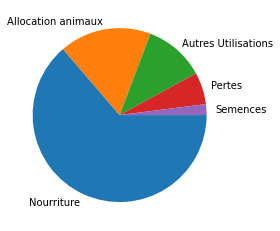

In [46]:
import matplotlib.pyplot as plt 

x = np.array([Total_nourriture, Total_animaux, Total_autres_utilisations,Total_pertes, Total_semences])
label = ["Nourriture", "Allocation animaux", "Autres Utilisations","Pertes", "Semences"]


plt.pie(x, labels=label, counterclock=False)
plt.show()

# Requête additionnelle: La Thaïlande et le manioc, exemple d'une gestion des ressources soulevant certaines questions

In [47]:
df_dispo_alim = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\dispo_alimentaire.csv")
df_sous_nutrition = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\sous_nutrition.csv")

In [48]:
df_dispo_alim = df_dispo_alim[df_dispo_alim["Zone"].eq("Thaïlande")]
df_dispo_alim = df_dispo_alim[df_dispo_alim["Produit"].eq("Manioc")]
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [49]:
df_sous_nutrition = df_sous_nutrition[df_sous_nutrition["Zone"].eq("Thaïlande")]
df_sous_nutrition = df_sous_nutrition[df_sous_nutrition["Année"].eq("2016-2018")]
df_sous_nutrition.head()

,Zone,Année,Valeur
1114,Thaïlande,2016-2018,6.2


Observations: 

La Thaïlande produit 30 millions de tonnes de manioc en 2017. 
Alors même que 6,2 millions de Thaïlandais sont en état de sous-nutrition, le pays exporte 83% de sa production. (Accessoirement, il en destine aussi 6% à l'alimentation animale.)

Cette situation de voir un pays exporter les ressources qui permettraient de nourrir sa propre population interroge sur la gestion des ressources ainsi que sur les mécanismes et enjeux régulant les flux de nourriture dans le monde. Cela engendre une grande contradiction: la Thaïlande n'a que peux de disponibilité intérieure (Manioc) comparé à sa production. 

car pour rappel: 

Disponibilité intérieure = Production + Importation - Exportation + Variation de Stock

## Demande Mélanie A) les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017


In [50]:
df_sous_nutrition = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\sous_nutrition.csv")
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [51]:
df_population = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\population.csv")
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [52]:
df_sous_nutrition = df_sous_nutrition[df_sous_nutrition['Année'].eq('2016-2018')]
df_population = df_population[df_population['Année'].eq(2017)]

In [53]:
df_final = pd.merge(df_sous_nutrition, df_population, on='Zone', how='inner')
df_final.head()

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2016-2018,10.5,2017,36296.113
1,Afrique du Sud,2016-2018,3.1,2017,57009.756
2,Albanie,2016-2018,0.1,2017,2884.169
3,Algérie,2016-2018,1.3,2017,41389.189
4,Allemagne,2016-2018,NaN,2017,82658.409


In [54]:
del df_final['Année_x']
del df_final['Année_y']

In [55]:
df_final.dtypes

Zone         object
Valeur_x     object
Valeur_y    float64
dtype: object

In [56]:
df_final = df_final.rename(columns = {'Valeur_x' : "nb_ss_nutrition", 'Valeur_y' : 'pop_millions'})
df_final['pop_millions'] = df_final['pop_millions']*1000

In [57]:
inaccurate_nb = df_final[(df_final['nb_ss_nutrition'] == '<0.1')].index
df_final.drop(inaccurate_nb, inplace = True)

In [58]:
df_final['nb_ss_nutrition'] = df_final['nb_ss_nutrition'].astype(float)
df_final['pop_millions'] = df_final['pop_millions'].astype(float)

In [59]:
df_final.head()

,Zone,nb_ss_nutrition,pop_millions
0,Afghanistan,10.5,36296113.0
1,Afrique du Sud,3.1,57009756.0
2,Albanie,0.1,2884169.0
3,Algérie,1.3,41389189.0
4,Allemagne,NaN,82658409.0


In [60]:
df_final['pourcentage'] = (((df_final['nb_ss_nutrition']*10**6) / df_final['pop_millions'])*100).round(2)

In [61]:
resultat = df_final.sort_values(by = 'pourcentage', ascending = False)
resultat.head(25)

,Zone,nb_ss_nutrition,pop_millions,pourcentage
78,Haïti,5.3,10982366.0,48.26
157,République populaire démocratique de Corée,12.0,25429825.0,47.19
108,Madagascar,10.5,25570512.0,41.06
103,Libéria,1.8,4702226.0,38.28
100,Lesotho,0.8,2091534.0,38.25
183,Tchad,5.7,15016753.0,37.96
161,Rwanda,4.2,11980961.0,35.06
121,Mozambique,9.4,28649018.0,32.81
186,Timor-Leste,0.4,1243258.0,32.17
0,Afghanistan,10.5,36296113.0,28.93


## Demande Mélanie B) pays qui ont le plus bénéficié d’aide depuis 2013

In [62]:
df_aide_alimentaire = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\aide_alimentaire.csv")
df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [63]:
df_aide_alimentaire['Année'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

Remarque: en voyant le .head() nous pouvions supposer que 2013 était l'année de départ de récolte des données. Et on peut voir avec le unique que c'est le cas. Donc nous avons pouvons tout agréger. 

In [64]:
df_aide_alimentaire = df_aide_alimentaire.groupby(['Pays bénéficiaire']).sum('Valeur')
df_aide_alimentaire.head()

,Année,Valeur
Pays bénéficiaire,,
Afghanistan,32216,185452
Algérie,78561,81114
Angola,8054,5014
Bangladesh,50347,348188
Bhoutan,24170,2666


In [65]:
resultat_ordonné = df_aide_alimentaire.sort_values(by = 'Valeur', ascending = False)
del resultat_ordonné['Année']
resultat_ordonné = resultat_ordonné.rename(columns = {"Valeur" : "aide_reçue_tonnes"})

In [66]:
resultat_ordonné.head(10)

,aide_reçue_tonnes
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


## Demande Mélanie C) pays ayant le plus/le moins de disponibilité/habitant

In [67]:
df_dispo_alimentaire = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Projet 4\dispo_alimentaire.csv")
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [68]:
df_dispo_alimentaire = df_dispo_alimentaire.groupby(['Zone']).sum('Disponibilité alimentaire (Kcal/personne/jour)')

In [69]:
df_dispo_alimentaire = df_dispo_alimentaire.iloc[:,[2,3,4,5]]
df_dispo_alimentaire.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
Afghanistan,2087.0,351.41,33.50,58.26
Afrique du Sud,3020.0,564.80,83.58,85.33
Albanie,3188.0,1095.54,106.48,111.37
Algérie,3293.0,809.13,76.48,91.92
Allemagne,3503.0,957.52,141.62,101.39


In [70]:
df_dispo_alimentaire.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
République centrafricaine,1879.0,453.73,59.41,46.04
Zambie,1924.0,350.12,42.05,55.22
Madagascar,2056.0,425.07,24.49,46.69
Afghanistan,2087.0,351.41,33.50,58.26
Haïti,2089.0,397.78,48.92,47.70
...,...,...,...,...
Israël,3610.0,922.14,151.39,128.00
États-Unis d'Amérique,3682.0,1002.39,161.37,109.42
Turquie,3708.0,968.15,119.64,108.12
